# 1)  Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 2) Reading Dataset

In [2]:
heart_data = pd.read_csv("../input/heart-disease-detection-dataset/datasets_33180_43520_heart.csv")
heart_data_df = pd.DataFrame(heart_data)
heart_data_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Data contains;

* age - age in years
* sex - (1 = male; 0 = female)
* cp - chest pain type
* trestbps - resting blood pressure (in mm Hg on admission to the hospital)
* chol - serum cholestoral in mg/dl
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg - resting electrocardiographic results
* thalach - maximum heart rate achieved
* exang - exercise induced angina (1 = yes; 0 = no)
* oldpeak - ST depression induced by exercise relative to rest
* slope - the slope of the peak exercise ST segment
* ca - number of major vessels (0-3) colored by flourosopy
* thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
* target - have disease or not (1=yes, 0=no)

# 3) Preprocessing 

In [3]:
heart_data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [4]:
heart_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Since, our dataset was clean enough, so we could just avoid the various steps of preprocessing, but just check for null values

In [5]:
heart_data_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# 4) Visualization

Text(0.5, 0, 'Sex (0 = No Disease, 1= Have Disease)')

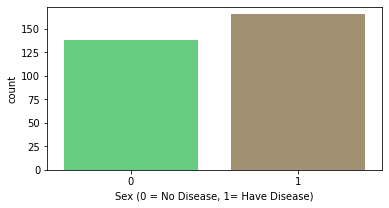

In [6]:
plt.figure(figsize=(6,3))
sns.countplot('target', data=heart_data_df, palette='terrain')
plt.xlabel("Sex (0 = No Disease, 1= Have Disease)")

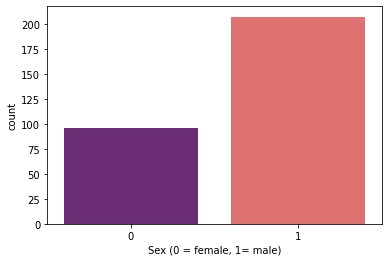

In [7]:
sns.countplot('sex', data=heart_data_df, palette="magma")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [8]:
FemaleCount = len(heart_data_df[heart_data_df.sex == 0])
MaleCount = len(heart_data_df[heart_data_df.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((FemaleCount / (len(heart_data_df.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((MaleCount / (len(heart_data_df.sex))*100)))

Percentage of Female Patients: 31.68%
Percentage of Male Patients: 68.32%


In [9]:
#grouping Dataset by the desired o/p and other columns respective of their mean
heart_data_df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


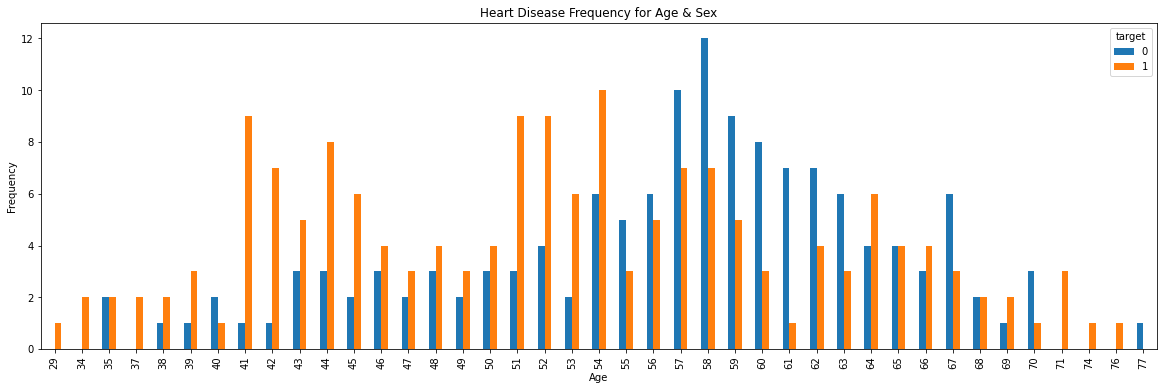

In [10]:
#Compute a simple cross tabulation of two (or more) factors. By default computes a frequency table of the factors unless
#an array of values and an aggregation function are passed.
pd.crosstab(heart_data_df.age, heart_data_df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Age & Sex')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

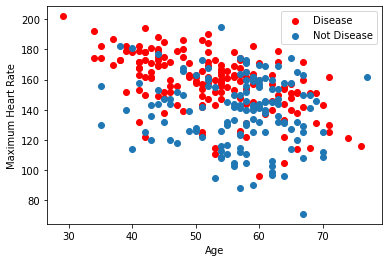

In [11]:
plt.scatter(heart_data_df.age[heart_data_df.target==1], heart_data_df.thalach[heart_data_df.target==1], c='red')
plt.scatter(heart_data_df.age[heart_data_df.target==0],heart_data_df.thalach[heart_data_df.target==0])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

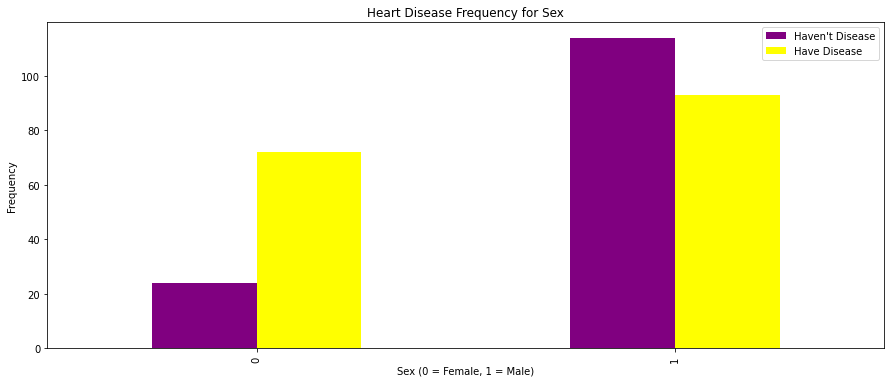

In [12]:
pd.crosstab(heart_data_df.sex,heart_data_df.target).plot(kind="bar",figsize=(15,6),color=['#800080','#FFFF00' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

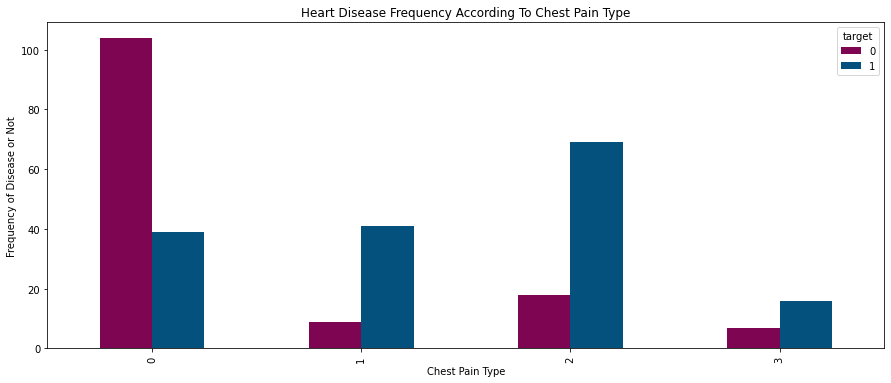

In [13]:
pd.crosstab(heart_data_df.cp,heart_data_df.target).plot(kind="bar",figsize=(15,6),color=['#7D0552','#05517D' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Frequency of Disease or Not')
plt.show()

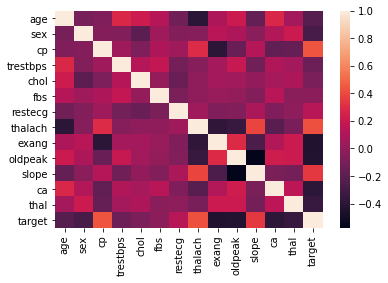

In [14]:
sns.heatmap(heart_data_df.corr())

<Figure size 864x720 with 0 Axes>

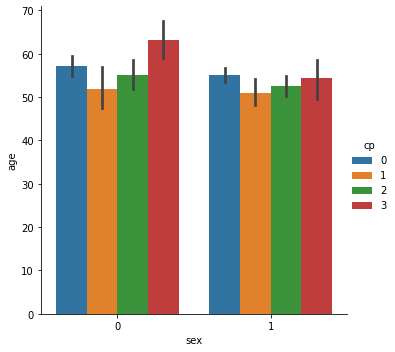

In [15]:
plt.figure(figsize=(12,10))
sns.catplot('sex', 'age', hue='cp', data = heart_data_df, kind='bar')

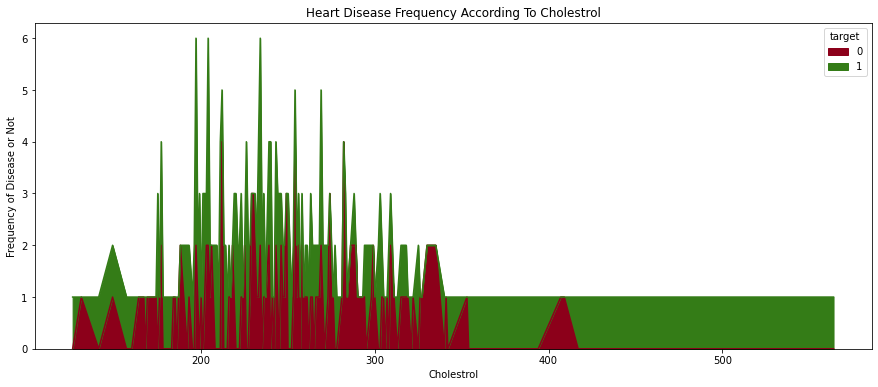

In [16]:
pd.crosstab(heart_data_df.chol,heart_data_df.target).plot(kind="area",figsize=(15,6),color=['#8C001A','#347C17' ])
plt.title('Heart Disease Frequency According To Cholestrol')
plt.xlabel('Cholestrol')
plt.ylabel('Frequency of Disease or Not')
plt.show()


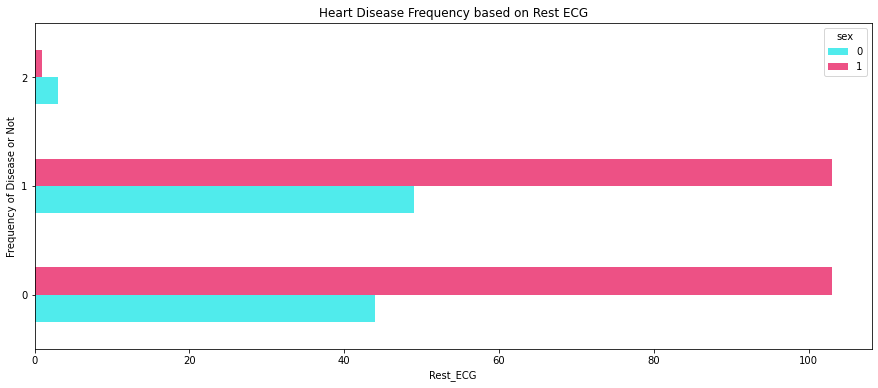

In [17]:
pd.crosstab(heart_data_df.restecg,heart_data_df.sex).plot(kind="barh",figsize=(15,6),color=['#50EBEC','#ED5185' ])
plt.title('Heart Disease Frequency based on Rest ECG')
plt.xlabel('Rest_ECG')
plt.ylabel('Frequency of Disease or Not')
plt.show()

# 5) Feature Engineering

This involves the selecting of features necessary for out further analysis

In [18]:
heart_data_df.drop(['slope', 'thal'], axis=1, inplace=True)
heart_data_df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target
0,63,1,3,145,233,1,0,150,0,2.3,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,1
2,41,0,1,130,204,0,0,172,0,1.4,0,1
3,56,1,1,120,236,0,1,178,0,0.8,0,1
4,57,0,0,120,354,0,1,163,1,0.6,0,1
5,57,1,0,140,192,0,1,148,0,0.4,0,1
6,56,0,1,140,294,0,0,153,0,1.3,0,1
7,44,1,1,120,263,0,1,173,0,0.0,0,1
8,52,1,2,172,199,1,1,162,0,0.5,0,1
9,57,1,2,150,168,0,1,174,0,1.6,0,1


# 6) Data Splitting

In [19]:
x = heart_data_df.drop(['target'], axis=1)
y = heart_data_df['target'].values

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=32)

# 7) Model Selection, Training & Prediction

# 7 a) Using Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [22]:
accuracies = {}

In [23]:
acc = log.score(X_test,y_test)*100
accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 80.43%


# 7b) Using Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier()
dc.fit(X_train, y_train)

acc = dc.score(X_test, y_test)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 80.43%


# 7c) Using Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(X_train, y_train)

acc = rf.score(X_test,y_test)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 84.78%


# 8) Comparing Models

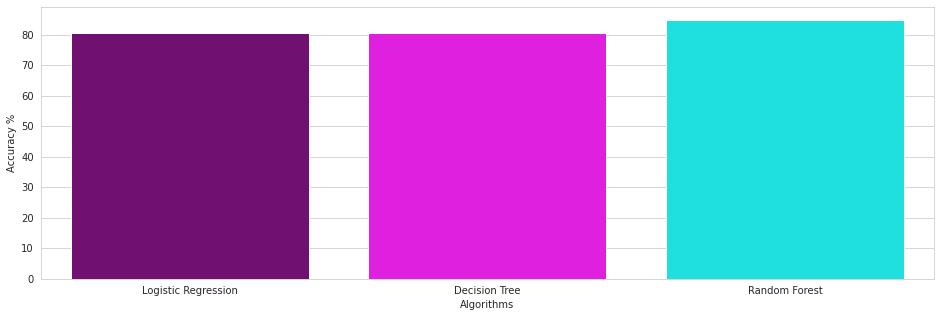

In [26]:
colors = ["purple", "magenta", "cyan"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()


In [27]:
log_pred = log.predict(X_test)
dt_pred = dc.predict(X_test)
rand_for_pred = rf.predict(X_test)
print(log_pred)
print(dt_pred)
print(rand_for_pred)

[1 0 1 1 1 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1
 1 1 1 0 1 1 1 1 0]
[1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 1 1 1 1 0 1 1
 1 1 0 0 1 1 0 1 0]
[1 0 1 1 1 1 0 0 1 1 1 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1
 1 1 0 1 1 1 1 1 0]


In [28]:
from sklearn.metrics import confusion_matrix

cm_log = confusion_matrix(y_test, log_pred )
cm_dt = confusion_matrix(y_test, dt_pred)
cm_rf = confusion_matrix(y_test,rand_for_pred)

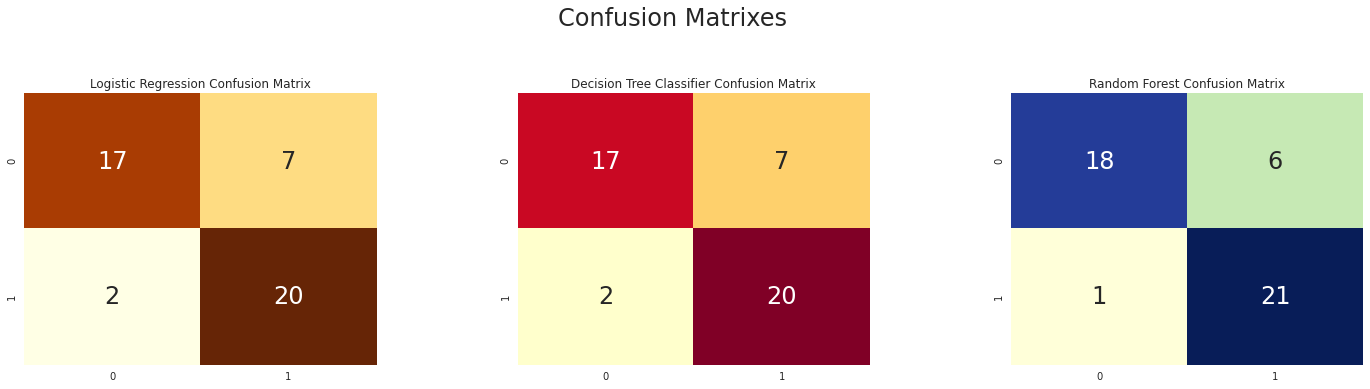

In [29]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_log,annot=True,cmap="YlOrBr",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dt,annot=True,cmap="YlOrRd",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="YlGnBu",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

***This analysis clearifies that RandomForest could be the best model for the heart disease detection as it has an accuracy of 85%, so this could give nore precised result of the record***